In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.formula.api as smf
from scipy.stats.mstats import winsorize

from plotnine import *
from mizani.formatters import percent_format, comma_format
from joblib import Parallel, delayed, cpu_count
from dateutil.relativedelta import relativedelta

In [3]:
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

In [4]:
prices_monthly = pd.read_sql_query(
    sql="""
        SELECT symbol, date, ret_excess 
        FROM prices_monthly
    """,
    con=tidy_finance,
    parse_dates={"date"}
)

# Add year for merging with fundamentals
prices_monthly["year"] = prices_monthly["date"].dt.year

print(f"Loaded {len(prices_monthly):,} monthly observations")
print(f"Covering {prices_monthly['symbol'].nunique():,} unique stocks")
print(f"Date range: {prices_monthly['date'].min():%Y-%m} to {prices_monthly['date'].max():%Y-%m}")

Loaded 209,495 monthly observations
Covering 1,837 unique stocks
Date range: 2010-01 to 2025-05


In [5]:
prices_daily = pd.read_sql_query(
    sql="""
        SELECT symbol, date, ret_excess 
        FROM prices_daily
    """,
    con=tidy_finance,
    parse_dates={"date"}
)

In [6]:
comp_vn = pd.read_sql_query(
    sql="""
        SELECT symbol, datadate, icb_name_vi 
        FROM comp_vn
    """,
    con=tidy_finance,
    parse_dates={"datadate"}
)

# Extract year for merging
comp_vn["year"] = comp_vn["datadate"].dt.year

print(f"Company data: {comp_vn['symbol'].nunique():,} firms")

Company data: 1,502 firms


In [7]:
# Option 1: Load pre-computed market factor
factors_ff3_monthly = pd.read_sql_query(
    sql="SELECT date, mkt_excess FROM factors_ff3_monthly",
    con=tidy_finance,
    parse_dates={"date"}
)

# Option 2: Construct market return from stock data (if factors not available)
# This computes the value-weighted average return across all stocks
def compute_market_return(prices_df):
    """
    Compute value-weighted market return from individual stock returns.
    
    Parameters
    ----------
    prices_df : pd.DataFrame
        Stock returns with mktcap_lag for weighting
        
    Returns
    -------
    pd.DataFrame
        Monthly market excess returns
    """
    market_return = (prices_df
        .groupby("date")
        .apply(lambda x: np.average(x["ret_excess"], weights=x["mktcap_lag"]))
        .reset_index(name="mkt_excess")
    )
    return market_return

In [8]:
# Merge stock returns with market returns
prices_monthly = prices_monthly.merge(
    factors_ff3_monthly, 
    on="date", 
    how="left"
)

# Merge with company information for industry classification
prices_monthly = prices_monthly.merge(
    comp_vn[["symbol", "year", "icb_name_vi"]], 
    on=["symbol", "year"], 
    how="left"
)

# Remove observations with missing data
prices_monthly = prices_monthly.dropna(subset=["ret_excess", "mkt_excess"])

print(f"Final estimation sample: {len(prices_monthly):,} observations")

Final estimation sample: 169,983 observations


In [9]:
def winsorize_returns(df, columns, limits=(0.01, 0.01)):
    """
    Apply winsorization to return columns to limit outlier influence.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing return columns
    columns : list
        Column names to winsorize
    limits : tuple
        Lower and upper percentile limits for winsorization
        
    Returns
    -------
    pd.DataFrame
        DataFrame with winsorized columns
    """
    df = df.copy()
    for col in columns:
        df[col] = winsorize(df[col], limits=limits)
    return df

prices_monthly = winsorize_returns(
    prices_monthly, 
    columns=["ret_excess", "mkt_excess"],
    limits=(0.01, 0.01)
)

print("Return distributions after winsorization:")
print(prices_monthly[["ret_excess", "mkt_excess"]].describe().round(4))

Return distributions after winsorization:
        ret_excess   mkt_excess
count  169983.0000  169983.0000
mean        0.0011      -0.0102
std         0.1548       0.0579
min        -0.4078      -0.1794
25%        -0.0700      -0.0384
50%        -0.0033      -0.0084
75%         0.0531       0.0219
max         0.6117       0.1221


/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4786: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4786: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.


In [10]:
# Filter data for Vingroup
vic_data = prices_monthly.query("symbol == 'VIC'").copy()

print(f"VIC observations: {len(vic_data)}")
print(f"Date range: {vic_data['date'].min():%Y-%m} to {vic_data['date'].max():%Y-%m}")

VIC observations: 150
Date range: 2011-07 to 2023-12


In [11]:
# Estimate CAPM for Vingroup
model_vic = smf.ols(
    formula="ret_excess ~ mkt_excess",
    data=vic_data
).fit()

# Display regression results
print(model_vic.summary())

                            OLS Regression Results                            
Dep. Variable:             ret_excess   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     26.67
Date:                Wed, 04 Feb 2026   Prob (F-statistic):           7.66e-07
Time:                        08:56:34   Log-Likelihood:                 131.96
No. Observations:                 150   AIC:                            -259.9
Df Residuals:                     148   BIC:                            -253.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0075      0.008     -0.895      0.3

In [12]:
# Extract key estimates
coefficients = model_vic.summary2().tables[1]

print("\nKey estimates for Vingroup (VIC):")
print(f"  Beta:  {coefficients.loc['mkt_excess', 'Coef.']:.3f}")
print(f"  Alpha: {coefficients.loc['Intercept', 'Coef.']:.4f}")
print(f"  R²:    {model_vic.rsquared:.3f}")


Key estimates for Vingroup (VIC):
  Beta:  0.750
  Alpha: -0.0075
  R²:    0.153


In [13]:
def estimate_capm(data, min_obs=48):
    """
    Estimate CAPM regression and return coefficients.
    
    This function regresses excess stock returns on excess market returns
    and extracts the coefficient estimates along with t-statistics.
    
    Parameters
    ----------
    data : pd.DataFrame
        DataFrame with 'ret_excess' and 'mkt_excess' columns
    min_obs : int
        Minimum number of observations required for estimation
        
    Returns
    -------
    pd.DataFrame
        DataFrame with coefficient estimates and t-statistics,
        or empty DataFrame if insufficient observations
    """
    if len(data) < min_obs:
        return pd.DataFrame()
    
    try:
        # Estimate OLS regression
        model = smf.ols(
            formula="ret_excess ~ mkt_excess", 
            data=data
        ).fit()
        
        # Extract coefficient table
        coef_table = model.summary2().tables[1]
        
        # Format results
        results = pd.DataFrame({
            "coefficient": ["alpha", "beta"],
            "estimate": [
                coef_table.loc["Intercept", "Coef."],
                coef_table.loc["mkt_excess", "Coef."]
            ],
            "t_statistic": [
                coef_table.loc["Intercept", "t"],
                coef_table.loc["mkt_excess", "t"]
            ],
            "r_squared": model.rsquared
        })
        
        return results
        
    except Exception as e:
        # Return empty DataFrame if estimation fails
        return pd.DataFrame()

In [14]:
def roll_capm_estimation(data, look_back=60, min_obs=48):
    """
    Perform rolling-window CAPM estimation.
    
    This function slides a window across time, estimating the CAPM
    regression at each point using the most recent 'look_back' months
    of data.
    
    Parameters
    ----------
    data : pd.DataFrame
        DataFrame with 'date', 'ret_excess', and 'mkt_excess' columns
    look_back : int
        Number of months in the estimation window
    min_obs : int
        Minimum observations required within each window
        
    Returns
    -------
    pd.DataFrame
        Time series of coefficient estimates with dates
    """
    # Ensure data is sorted by date
    data = data.sort_values("date").copy()
    
    # Get unique dates
    dates = data["date"].drop_duplicates().sort_values()
    
    # Container for results
    results = []
    
    # Slide window across dates
    for i in range(look_back - 1, len(dates)):
        # Define window boundaries
        end_date = dates.iloc[i]
        start_date = end_date - relativedelta(months=look_back - 1)
        
        # Extract data within window
        window_data = data.query("date >= @start_date and date <= @end_date")
        
        # Estimate CAPM for this window
        window_results = estimate_capm(window_data, min_obs=min_obs)
        
        if not window_results.empty:
            window_results["date"] = end_date
            results.append(window_results)
    
    # Combine all results
    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame()

In [15]:
# Define example stocks
examples = pd.DataFrame({
    "symbol": ["FPT", "VNM", "VIC", "HPG", "VCB"],
    "company": [
        "FPT Corporation",      # Technology
        "Vinamilk",             # Consumer goods
        "Vingroup",             # Real estate/conglomerate
        "Hoa Phat Group",       # Steel/materials
        "Vietcombank"           # Banking
    ]
})

# Check data availability for each example
data_availability = (prices_monthly
    .query("symbol in @examples['symbol']")
    .groupby("symbol")
    .agg(
        n_obs=("date", "count"),
        first_date=("date", "min"),
        last_date=("date", "max")
    )
    .reset_index()
)

print("Data availability for example stocks:")
print(data_availability)

Data availability for example stocks:
  symbol  n_obs first_date  last_date
0    FPT    150 2011-07-31 2023-12-31
1    HPG    150 2011-07-31 2023-12-31
2    VCB    150 2011-07-31 2023-12-31
3    VIC    150 2011-07-31 2023-12-31
4    VNM    150 2011-07-31 2023-12-31


In [16]:
# Estimate rolling betas for example stocks
example_data = prices_monthly.query("symbol in @examples['symbol']")

capm_examples = (example_data
    .groupby("symbol", group_keys=True)
    .apply(lambda x: roll_capm_estimation(x), include_groups=False)
    .reset_index()
    .drop(columns="level_1", errors="ignore")
)

# Filter to beta estimates only
beta_examples = (capm_examples
    .query("coefficient == 'beta'")
    .merge(examples, on="symbol")
)

print(f"Rolling beta estimates: {len(beta_examples):,} observations")

Rolling beta estimates: 455 observations


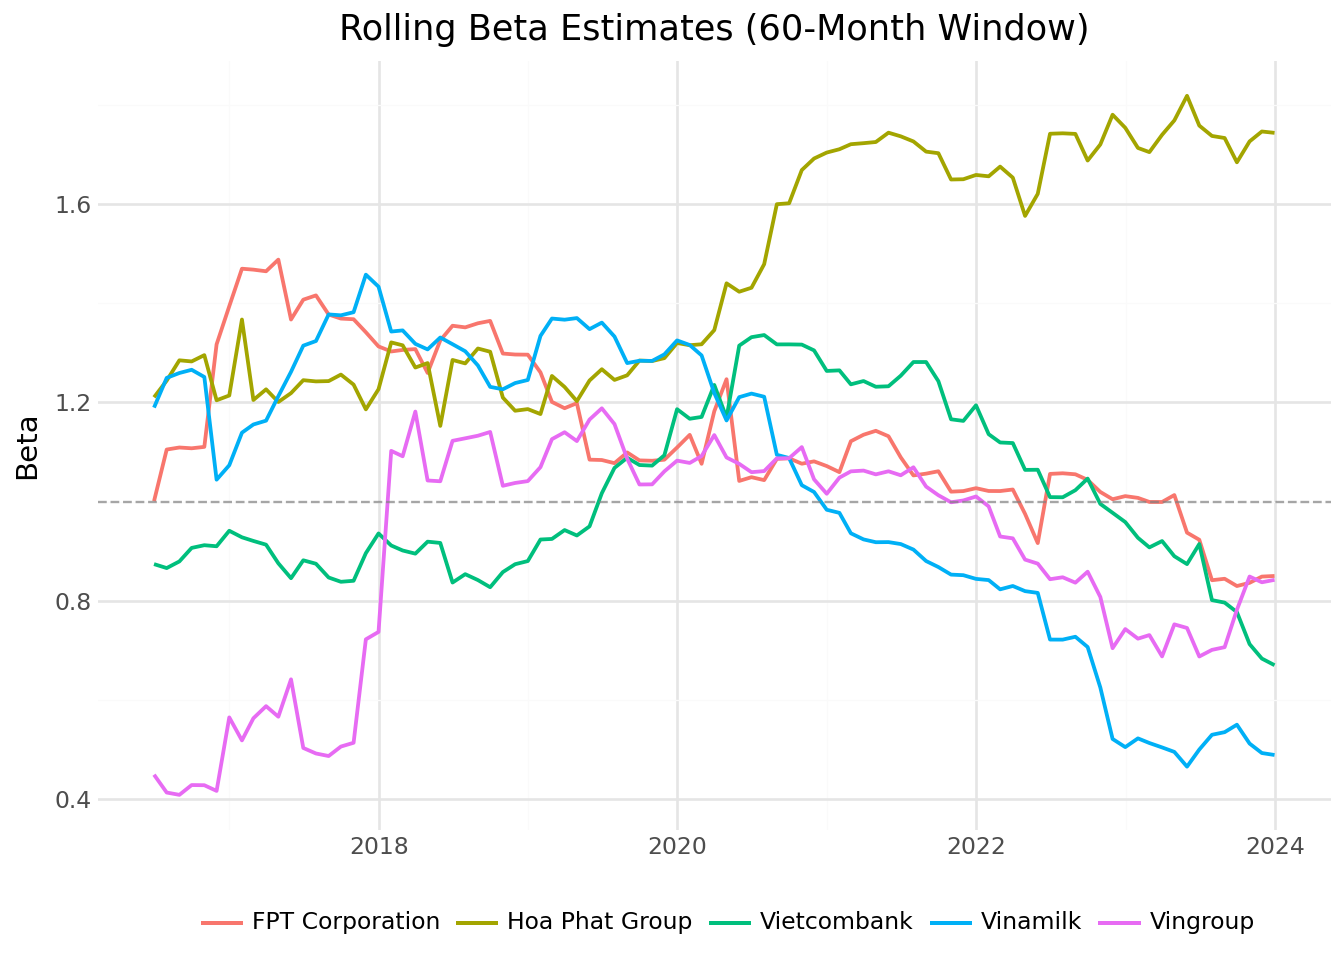

In [17]:
#| label: fig-rolling-betas
#| out-width: 90%
#| fig-align: center
#| fig-cap: Monthly rolling beta estimates for selected Vietnamese stocks using a 60-month estimation window. Different industries exhibit distinct patterns of market sensitivity over time.
#| fig-alt: Line chart showing time series of beta estimates for five Vietnamese stocks from different industries.
rolling_beta_figure = (
    ggplot(
        beta_examples,
        aes(x="date", y="estimate", color="company")
    )
    + geom_line(size=0.8)
    + geom_hline(yintercept=1, linetype="dashed", color="gray", alpha=0.7)
    + labs(
        x="",
        y="Beta",
        color="",
        title="Rolling Beta Estimates (60-Month Window)"
    )
    + scale_x_datetime(date_breaks="2 years", date_labels="%Y")
    + theme_minimal()
    + theme(legend_position="bottom")
)
rolling_beta_figure.show()

In [18]:
# Determine available cores (reserve one for system operations)
n_cores = max(1, cpu_count() - 1)
print(f"Available cores for parallel processing: {n_cores}")

Available cores for parallel processing: 19


In [19]:
def estimate_all_betas_parallel(data, n_cores, look_back=60, min_obs=48):
    """
    Estimate rolling betas for all stocks using parallel processing.
    
    Parameters
    ----------
    data : pd.DataFrame
        Full dataset with all stocks
    n_cores : int
        Number of CPU cores to use
    look_back : int
        Months in estimation window
    min_obs : int
        Minimum observations required
        
    Returns
    -------
    pd.DataFrame
        Beta estimates for all stocks and dates
    """
    # Group data by stock
    grouped = data.groupby("symbol", group_keys=False)
    
    # Define worker function
    def process_stock(name, group):
        result = roll_capm_estimation(group, look_back=look_back, min_obs=min_obs)
        if not result.empty:
            result["symbol"] = name
        return result
    
    # Execute in parallel
    results = Parallel(n_jobs=n_cores, verbose=1)(
        delayed(process_stock)(name, group) 
        for name, group in grouped
    )
    
    # Combine results
    results = [r for r in results if not r.empty]
    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame()

In [20]:
#| eval: false
# Estimate betas for all stocks
print("Estimating rolling betas for all stocks...")
capm_monthly = estimate_all_betas_parallel(
    prices_monthly, 
    n_cores=n_cores,
    look_back=60,
    min_obs=48
)

print(f"\nCompleted: {len(capm_monthly):,} coefficient estimates")
print(f"Unique stocks: {capm_monthly['symbol'].nunique():,}")

In [21]:
#| eval: false
capm_monthly.to_sql(
    name="capm_monthly",
    con=tidy_finance,
    if_exists="replace",
    index=False
)

print("CAPM estimates saved to database.")

In [22]:
capm_monthly = pd.read_sql_query(
    sql="SELECT * FROM capm_monthly",
    con=tidy_finance,
    parse_dates={"date"}
)

print(f"Loaded {len(capm_monthly):,} CAPM estimates")

Loaded 161,580 CAPM estimates


In [23]:
def compute_market_return_daily(tidy_finance):
    """
    Compute daily value-weighted market excess return from stock data.
    """
    # Load daily prices with market cap for weighting
    prices_daily_full = pd.read_sql_query(
        sql="""
            SELECT p.symbol, p.date, p.ret_excess, m.mktcap_lag
            FROM prices_daily p
            LEFT JOIN prices_monthly m ON p.symbol = m.symbol 
                AND strftime('%Y-%m', p.date) = strftime('%Y-%m', m.date)
        """,
        con=tidy_finance,
        parse_dates={"date"}
    )
    
    # Compute value-weighted market return each day
    mkt_daily = (prices_daily_full
        .dropna(subset=["ret_excess", "mktcap_lag"])
        .groupby("date")
        .apply(lambda x: np.average(x["ret_excess"], weights=x["mktcap_lag"]))
        .reset_index(name="mkt_excess")
    )
    
    return mkt_daily


def roll_capm_estimation_daily(data, look_back_days=1260, min_obs=1000):
    """
    Perform rolling-window CAPM estimation using daily data.
    
    Parameters
    ----------
    data : pd.DataFrame
        DataFrame with 'date', 'ret_excess', and 'mkt_excess' columns
    look_back_days : int
        Number of trading days in the estimation window
    min_obs : int
        Minimum daily observations required within each window
        
    Returns
    -------
    pd.DataFrame
        Time series of coefficient estimates with dates
    """
    data = data.sort_values("date").copy()
    dates = data["date"].drop_duplicates().sort_values().reset_index(drop=True)
    
    results = []
    
    for i in range(look_back_days - 1, len(dates)):
        end_date = dates.iloc[i]
        start_idx = max(0, i - look_back_days + 1)
        start_date = dates.iloc[start_idx]
        
        window_data = data.query("date >= @start_date and date <= @end_date")
        window_results = estimate_capm(window_data, min_obs=min_obs)
        
        if not window_results.empty:
            window_results["date"] = end_date
            results.append(window_results)
    
    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame()


def estimate_daily_betas_batch(symbols, tidy_finance, n_cores, batch_size=500, 
                                look_back_days=1260, min_obs=1000):
    """
    Estimate rolling betas from daily data using batch processing.
    """
    # First, compute or load market return
    print("Computing daily market excess returns...")
    mkt_daily = compute_market_return_daily(tidy_finance)
    print(f"Market returns: {len(mkt_daily)} days")
    
    n_batches = int(np.ceil(len(symbols) / batch_size))
    all_results = []
    
    for j in range(n_batches):
        batch_start = j * batch_size
        batch_end = min((j + 1) * batch_size, len(symbols))
        batch_symbols = symbols[batch_start:batch_end]
        
        symbol_list = ", ".join(f"'{s}'" for s in batch_symbols)
        
        query = f"""
            SELECT symbol, date, ret_excess
            FROM prices_daily
            WHERE symbol IN ({symbol_list})
        """
        
        prices_daily_batch = pd.read_sql_query(
            sql=query,
            con=tidy_finance,
            parse_dates={"date"}
        )
        
        # Merge with market excess return
        prices_daily_batch = prices_daily_batch.merge(
            mkt_daily, 
            on="date", 
            how="inner"
        )
        
        # Group by symbol and estimate betas
        grouped = prices_daily_batch.groupby("symbol", group_keys=False)
        
        # Parallel estimation
        batch_results = Parallel(n_jobs=n_cores)(
            delayed(lambda name, group: 
                roll_capm_estimation_daily(group, look_back_days=look_back_days, min_obs=min_obs)
                .assign(symbol=name)
            )(name, group)
            for name, group in grouped
        )
        
        batch_results = [r for r in batch_results if r is not None and not r.empty]
        
        if batch_results:
            all_results.append(pd.concat(batch_results, ignore_index=True))
        
        print(f"Batch {j+1}/{n_batches} complete")
    
    if all_results:
        return pd.concat(all_results, ignore_index=True)
    else:
        return pd.DataFrame()

In [24]:
#| eval: false
symbols = prices_monthly["symbol"].unique().tolist()

capm_daily = estimate_daily_betas_batch(
    symbols=symbols,
    tidy_finance=tidy_finance,
    n_cores=n_cores,
    batch_size=500,
    look_back_days=1260,  # ~5 years of trading days
    min_obs=1000
)

print(f"Daily beta estimates: {len(capm_daily):,}")

In [25]:
#| eval: false
capm_daily.to_sql(
    name="capm_daily",
    con=tidy_finance,
    if_exists="replace",
    index=False
)

print("CAPM estimates saved to database.")

In [26]:
capm_daily = pd.read_sql_query(
    sql="SELECT * FROM capm_daily",
    con=tidy_finance,
    parse_dates={"date"}
)

print(f"Loaded {len(capm_daily):,} CAPM estimates")

Loaded 3,394,490 CAPM estimates


In [27]:
# Extract monthly betas
beta_monthly = (capm_monthly
    .query("coefficient == 'beta'")
    .rename(columns={"estimate": "beta"})
    [["symbol", "date", "beta"]]
    .assign(frequency="monthly")
)

# Save to database
beta_monthly.to_sql(
    name="beta_monthly",
    con=tidy_finance,
    if_exists="replace",
    index=False
)

print(f"Monthly betas: {len(beta_monthly):,} observations")
print(f"Unique stocks: {beta_monthly['symbol'].nunique():,}")

Monthly betas: 80,790 observations
Unique stocks: 1,383


In [28]:
# Load pre-computed betas
beta_monthly = pd.read_sql_query(
    sql="SELECT * FROM beta_monthly",
    con=tidy_finance,
    parse_dates={"date"}
)

In [29]:
print("Beta Summary Statistics:")
print(beta_monthly["beta"].describe().round(3))

# Additional diagnostics
print(f"\nStocks with negative average beta: {(beta_monthly.groupby('symbol')['beta'].mean() < 0).sum()}")
print(f"Stocks with beta > 2: {(beta_monthly.groupby('symbol')['beta'].mean() > 2).sum()}")

Beta Summary Statistics:
count    80790.000
mean         0.501
std          0.539
min         -1.345
25%          0.130
50%          0.447
75%          0.832
max          2.678
Name: beta, dtype: float64

Stocks with negative average beta: 177
Stocks with beta > 2: 5


In [30]:
# Merge betas with industry information
beta_with_industry = (beta_monthly
    .merge(
        prices_monthly[["symbol", "date", "icb_name_vi"]].drop_duplicates(),
        on=["symbol", "date"],
        how="left"
    )
    .dropna(subset=["icb_name_vi"])
)

# Compute firm-level average beta by industry
beta_by_industry = (beta_with_industry
    .groupby(["icb_name_vi", "symbol"])["beta"]
    .mean()
    .reset_index()
)

# Order industries by median beta
industry_order = (beta_by_industry
    .groupby("icb_name_vi")["beta"]
    .median()
    .sort_values()
    .index.tolist()
)

# Select top 10 industries by number of firms for clearer visualization
top_industries = (beta_by_industry
    .groupby("icb_name_vi")
    .size()
    .nlargest(10)
    .index.tolist()
)

beta_by_industry_filtered = beta_by_industry.query("icb_name_vi in @top_industries")

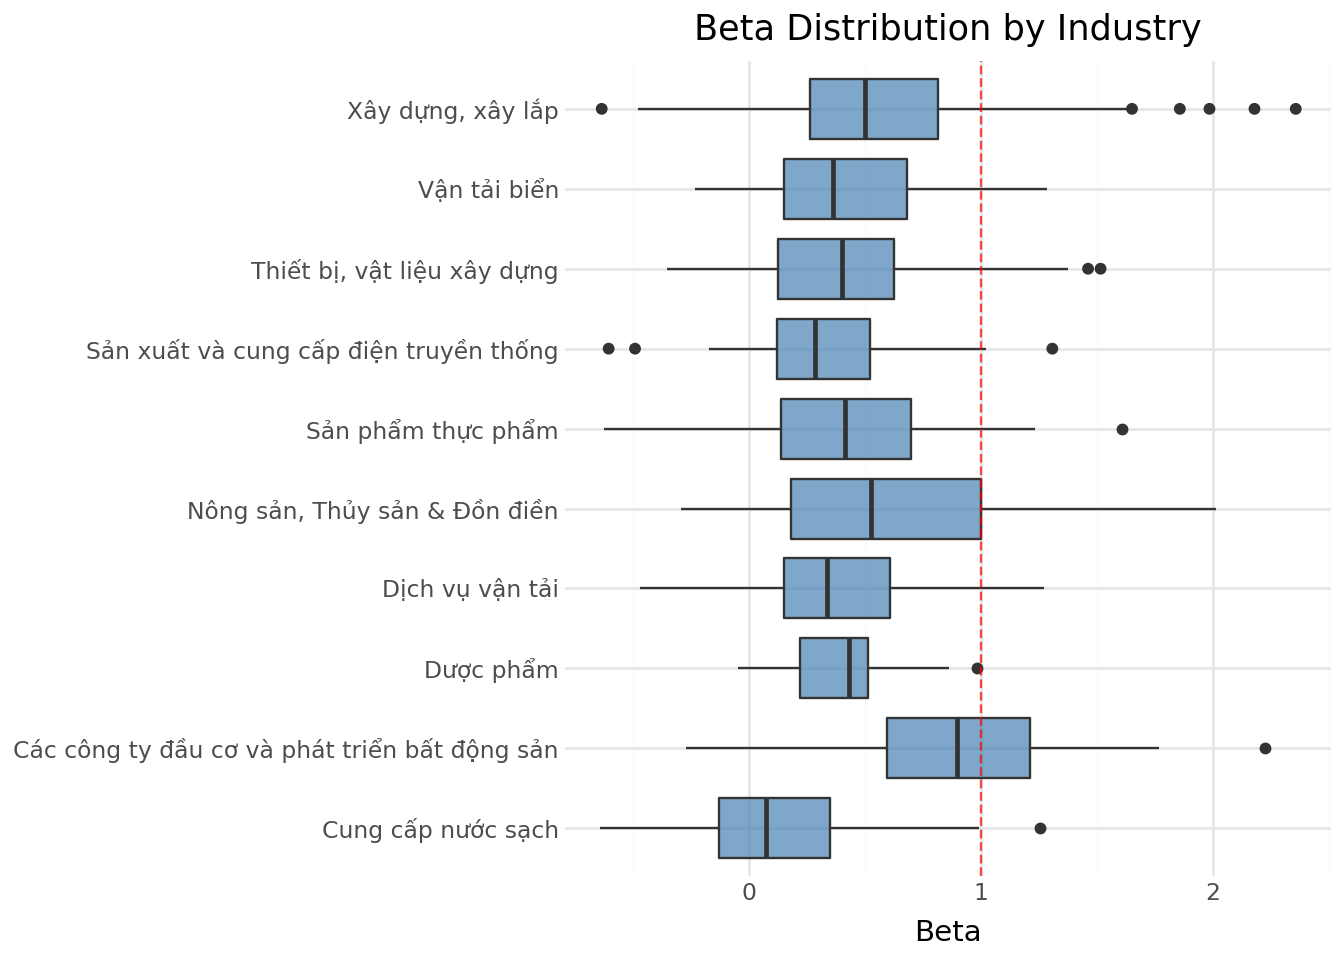

In [31]:
#| label: fig-beta-by-industry
#| fig-cap: Distribution of firm-level average betas across Vietnamese industries. Box plots show the median, interquartile range, and outliers for each industry.
#| fig-alt: Box plots showing beta distributions by industry, ordered by median beta.
beta_industry_figure = (
    ggplot(
        beta_by_industry_filtered,
        aes(x="icb_name_vi", y="beta")
    )
    + geom_boxplot(fill="steelblue", alpha=0.7)
    + geom_hline(yintercept=1, linetype="dashed", color="red", alpha=0.7)
    + coord_flip()
    + labs(
        x="",
        y="Beta",
        title="Beta Distribution by Industry"
    )
    + theme_minimal()
)
beta_industry_figure.show()

In [32]:
#| label: fig-beta-quantiles
#| eval: false
#| fig-cap: Monthly quantiles of beta estimates over time. Each line represents a decile of the cross-sectional beta distribution.
#| fig-alt: Line chart showing time series of beta deciles, illustrating how the distribution of betas has changed over time.
# Compute monthly quantiles
beta_quantiles = (beta_monthly
    .groupby("date")["beta"]
    .quantile(q=np.arange(0.1, 1.0, 0.1))
    .reset_index()
    .rename(columns={"level_1": "quantile"})
    .assign(quantile=lambda x: (x["quantile"] * 100).astype(int).astype(str) + "%")
)

beta_quantiles_figure = (
    ggplot(
        beta_quantiles,
        aes(x="date", y="beta", color="quantile")
    )
    + geom_line(alpha=0.8)
    + geom_hline(yintercept=1, linetype="dashed", color="gray")
    + labs(
        x="",
        y="Beta",
        color="Quantile",
        title="Cross-Sectional Distribution of Betas Over Time"
    )
    + scale_x_datetime(date_breaks="2 years", date_labels="%Y")
    + theme_minimal()
)
beta_quantiles_figure.show()

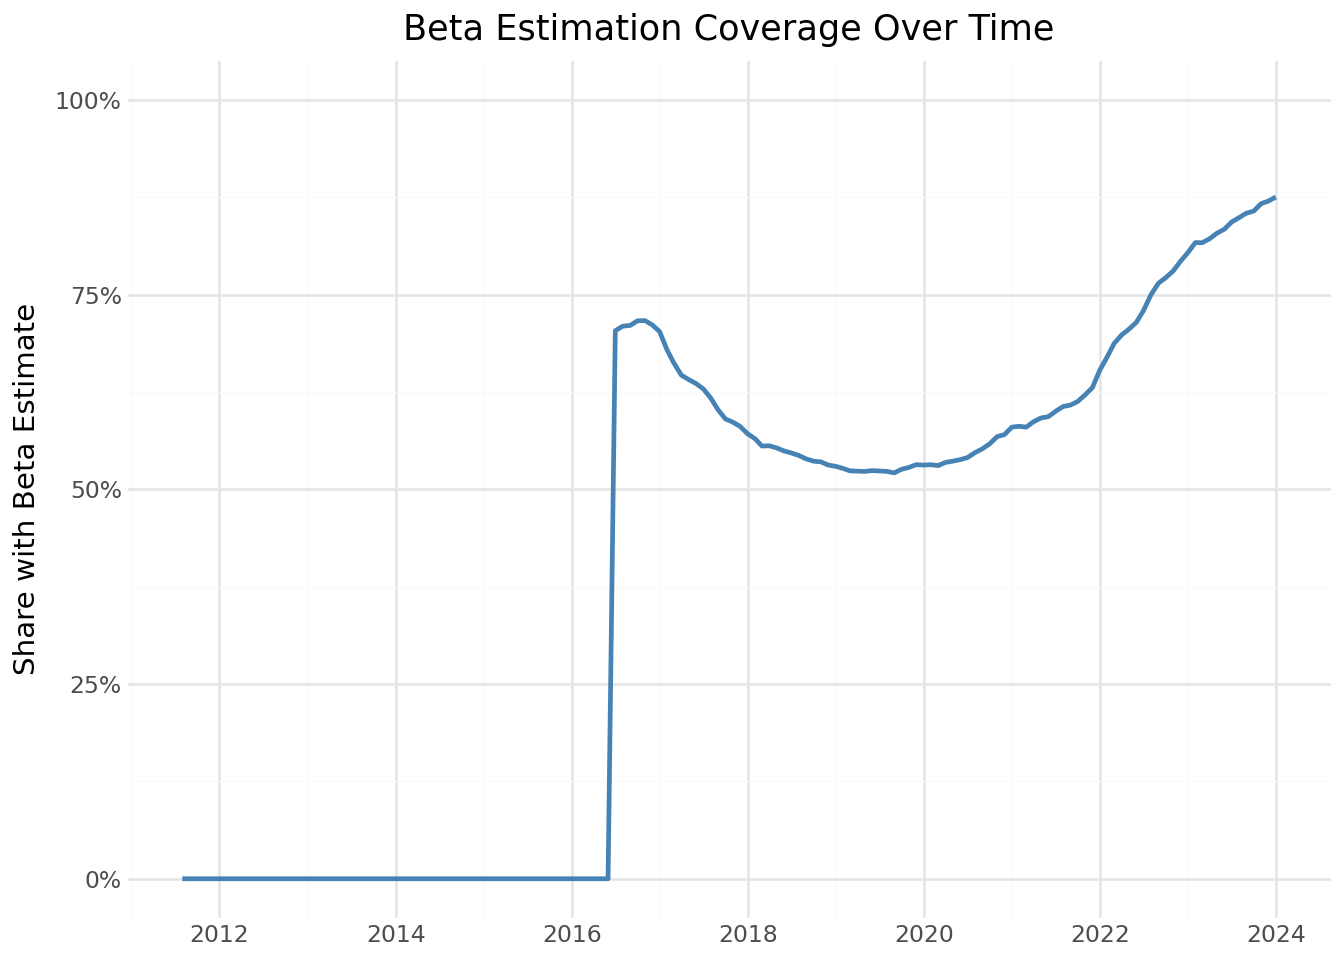

In [33]:
#| label: fig-beta-coverage
#| fig-cap: Share of stocks with available beta estimates over time. Coverage increases as more stocks accumulate sufficient return history.
#| fig-alt: Line chart showing the percentage of stocks with beta estimates available each month.
# Count stocks with and without betas
coverage = (prices_monthly
    .groupby("date")["symbol"]
    .nunique()
    .reset_index(name="total_stocks")
    .merge(
        beta_monthly.groupby("date")["symbol"].nunique().reset_index(name="with_beta"),
        on="date",
        how="left"
    )
    .fillna(0)
    .assign(coverage=lambda x: x["with_beta"] / x["total_stocks"])
)

coverage_figure = (
    ggplot(coverage, aes(x="date", y="coverage"))
    + geom_line(color="steelblue", size=1)
    + labs(
        x="",
        y="Share with Beta Estimate",
        title="Beta Estimation Coverage Over Time"
    )
    + scale_y_continuous(labels=percent_format(), limits=(0, 1))
    + scale_x_datetime(date_breaks="2 years", date_labels="%Y")
    + theme_minimal()
)
coverage_figure.show()

In [34]:
# Combine monthly and daily estimates
beta_daily = (capm_daily
    .query("coefficient == 'beta'")
    .rename(columns={"estimate": "beta"})
    [["symbol", "date", "beta"]]
    .assign(frequency="daily")
)

beta_combined = pd.concat([beta_monthly, beta_daily], ignore_index=True)

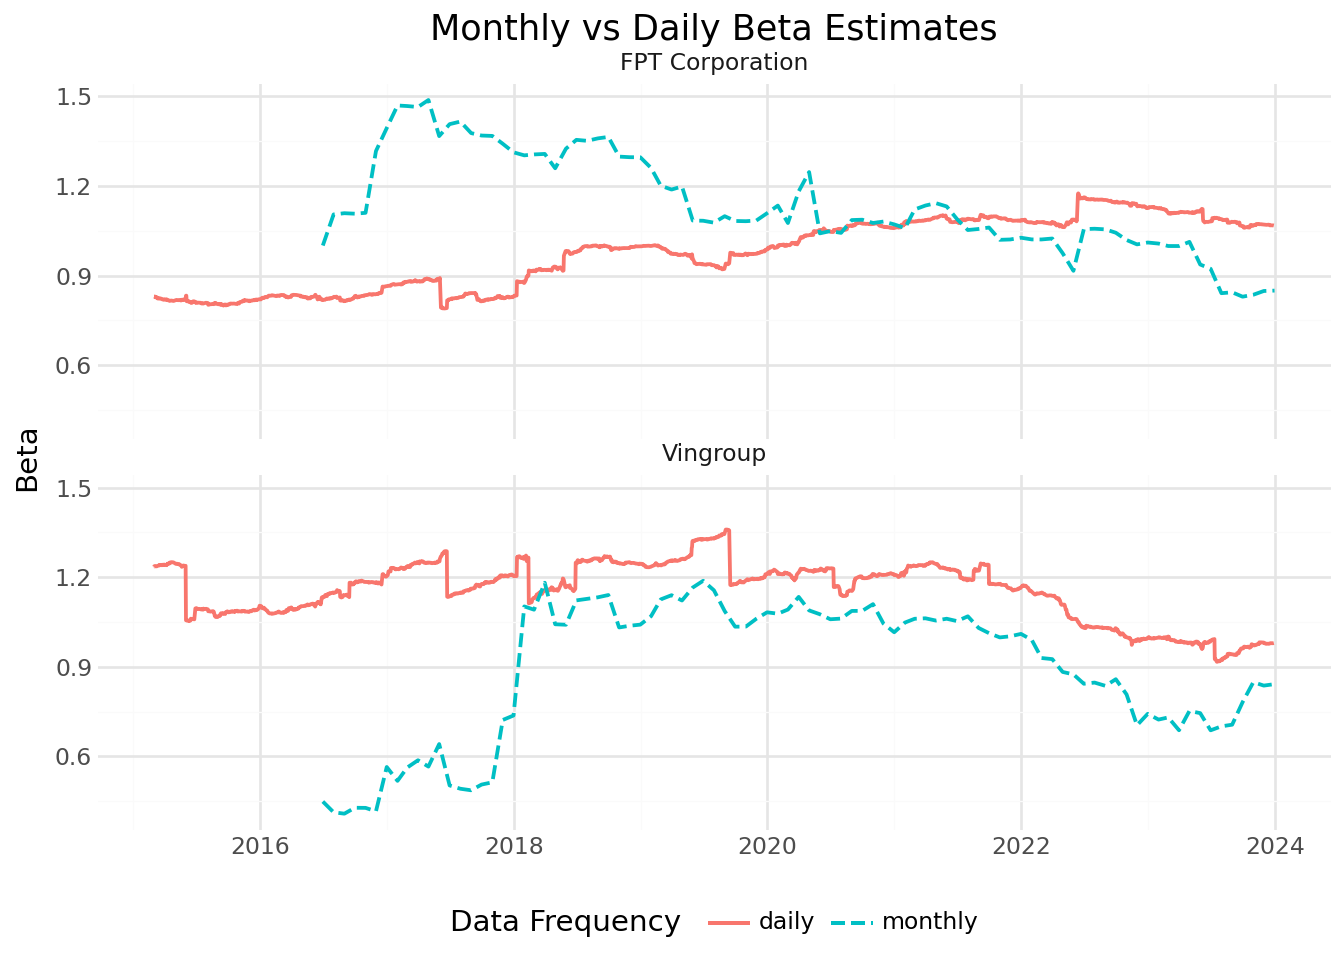

In [35]:
#| label: fig-beta-comparison
#| fig-cap: Comparison of beta estimates using monthly versus daily returns for selected stocks. Daily estimates are smoother due to more observations per estimation window.
#| fig-alt: Line chart comparing monthly and daily beta estimates over time for example stocks.
# Filter to example stocks
beta_comparison = (beta_combined
    .merge(examples, on="symbol")
    .query("symbol in ['VIC', 'FPT']")  # Select two for clarity
)

comparison_figure = (
    ggplot(
        beta_comparison,
        aes(x="date", y="beta", color="frequency", linetype="frequency")
    )
    + geom_line(size=0.8)
    + facet_wrap("~company", ncol=1)
    + labs(
        x="",
        y="Beta",
        color="Data Frequency",
        linetype="Data Frequency",
        title="Monthly vs Daily Beta Estimates"
    )
    + scale_x_datetime(date_breaks="2 years", date_labels="%Y")
    + theme_minimal()
    + theme(legend_position="bottom")
)
comparison_figure.show()

In [36]:
# Correlation between monthly and daily estimates
correlation_data = (beta_combined
    .pivot_table(index=["symbol", "date"], columns="frequency", values="beta")
    .dropna()
)

print(f"Correlation between monthly and daily betas: {correlation_data.corr().iloc[0,1]:.3f}")

Correlation between monthly and daily betas: 0.745
